In [18]:
from utils import *
import numpy as np
import time
import pprint
import plotly.io as pio
import plotly.offline as pyo
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import unary_union
pyo.init_notebook_mode(connected=True)
np.set_printoptions(suppress=True)
#pio.renderers.default = 'browser'
pp = pprint.PrettyPrinter(indent=4)

In [19]:
# Set the latitude and longitude of the center point
lat = 51.5074
lon = 0.1278
radius = 59

In [20]:
# Find all the buildings in the given search location
data = find_buildings(lat, lon, radius)

<Response [200]>


In [21]:
# Populate the dict 'buildings' with all the relevant data
buildings = populate_buildings(data)
#pp.pprint(buildings)

Processed 38 buildings


In [27]:
# Convert the node numbers to latitude and longitude coordinates (slow!)
start = time.time()
buildings = convert_node_to_coords(buildings, plot=False)
end = time.time()
print(f"Time taken: {end-start}")

Time taken: 45.69793701171875


In [29]:
# Create a list of building instances that we can work with
#bN = [building(building_from_ind(buildings, i)[1]) for i in range(len(buildings))]

# Get a dataframe for the first building. This is for calculating the central point for the sun's path
central_building  = building_from_ind(buildings, 0)[0]

In [32]:
# Calculate the sun's vector centered around central_building 
sunpath = calc_sunvector(central_building, (2022, 6, 21, 20, 0, 0, 0))

building_list = [building(building_from_ind(buildings, i)[1]) for i in range(len(buildings))]

start = time.time()
calculate_shadows(building_list, sunpath)
end = time.time()

print(f"Finished calculating shadows! Time taken: {end-start}s")

# Calculate the geometries of the shadows for each building. List of dataframes defining the outline of each shadow
shadows = [pd.DataFrame(b.overall_shadow_poly,columns=["lat", "lon", "height"])/111139  for b in building_list]

# Visualise the buildings and the shadows together
plotly_buildings(buildings, shadows, zoom=15)

Finished calculating shadows! Time taken: 0.6207616329193115s


<IPython.core.display.Javascript object>


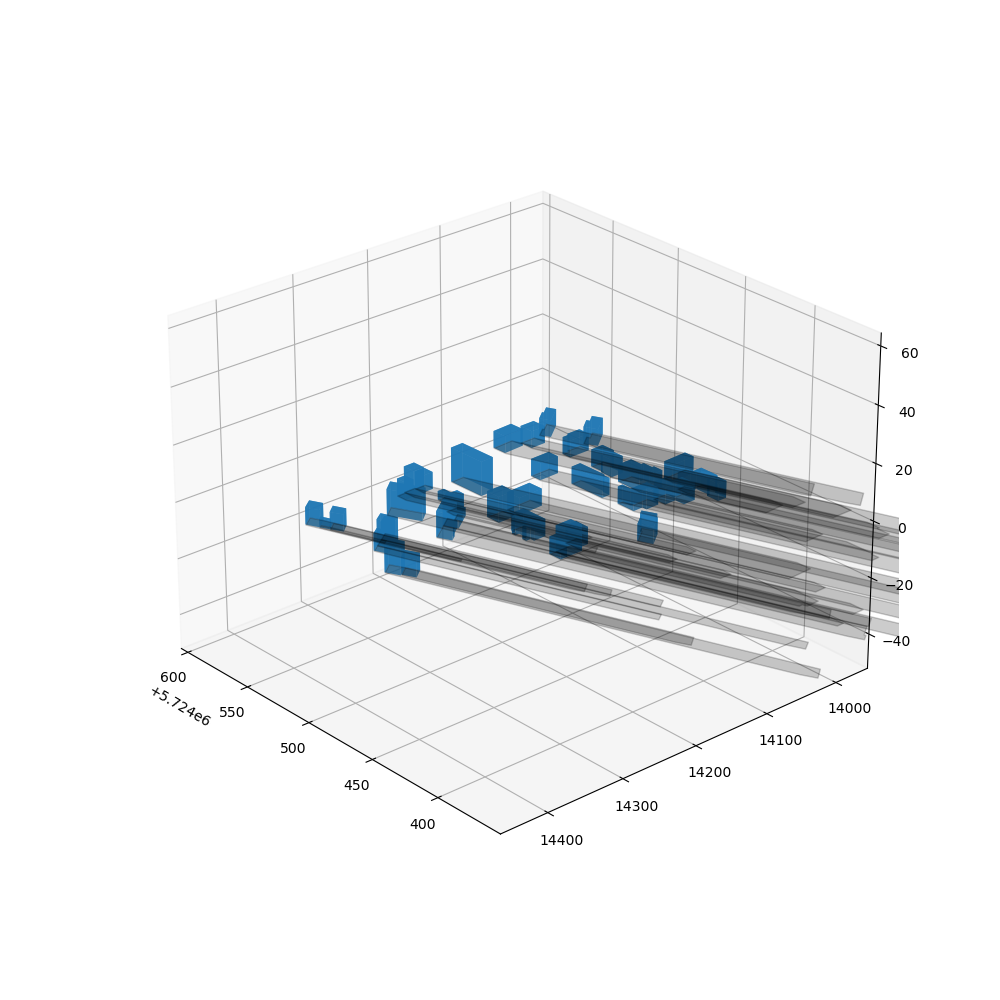

C:\Users\aolux\Documents\pubs-in-sun\utils.py:663: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [33]:
%matplotlib notebook
    
plot_rays_vertices(bN, s=50, figsize=(10,10), extent_offset=50)